<a href="https://colab.research.google.com/github/vishwasjoshi2019/Stock_Market_Analysis/blob/main/Option_chain_Stats(GOLD_ETF_American_Market).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import timedelta

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-18  178.820007  179.410004  178.380005  179.389999  179.389999   
2023-09-19  179.539993  179.649994  179.029999  179.220001  179.220001   
2023-09-20  179.339996  180.660004  179.320007  179.350006  179.350006   
2023-09-21  177.860001  178.490005  177.690002  178.050003  178.050003   
2023-09-22  178.649994  178.949997  178.509995  178.619995  178.619995   

             Volume  Daily_Movement  
Date                                 
2023-09-18  5049300        1.029999  
2023-09-19  4224700        0.619995  
2023-09-20  9328000        1.339996  
2023-09-21  757

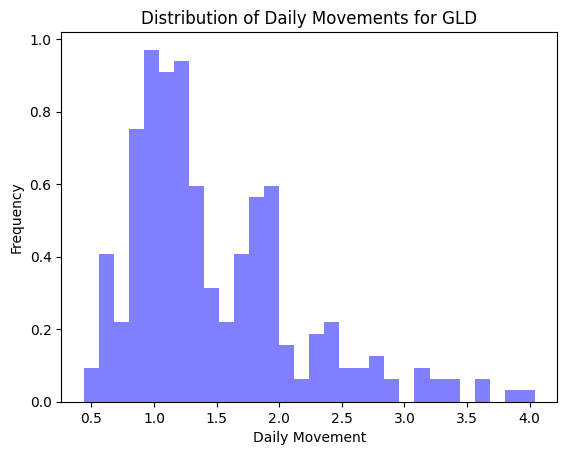

In [ ]:
#GLD SPDR

# Define the ticker symbol for GLD
ticker_symbol = "GLD"

# Define the date range for historical data (e.g., 1 year)
start_date = "2022-09-01"
end_date = "2023-09-24"

# Fetch historical data from Yahoo Finance for GLD
gld_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the daily movement (high - low) for GLD
gld_data["Daily_Movement"] = gld_data["High"] - gld_data["Low"]

# Calculate statistics for GLD
average_daily_movement = gld_data["Daily_Movement"].mean()
std_deviation = gld_data["Daily_Movement"].std()
median_daily_movement = gld_data["Daily_Movement"].median()
skewness = gld_data["Daily_Movement"].skew()
kurt = gld_data["Daily_Movement"].kurtosis()

# Calculate the number of values within ±1 and ±2 standard deviations from the mean for GLD
mean = gld_data["Daily_Movement"].mean()
std = gld_data["Daily_Movement"].std()
within_1_std = ((gld_data["Daily_Movement"] >= mean - std) & (gld_data["Daily_Movement"] <= mean + std)).sum()
within_2_std = ((gld_data["Daily_Movement"] >= mean - 2 * std) & (gld_data["Daily_Movement"] <= mean + 2 * std)).sum()

# Find the date when the all-time high daily move occurred for GLD
all_time_high_daily_move = gld_data["High"] - gld_data["Low"]
date_of_all_time_high_move = gld_data.index[gld_data["High"] - gld_data["Low"] == all_time_high_daily_move.max()][0]
max_daily_move = all_time_high_daily_move.max()

# Calculate the normal distribution for GLD
normal_distribution = stats.norm(loc=mean, scale=std_deviation)

# Calculate the probability of values within ±1 and ±2 standard deviations for GLD
confidence_level = 0.95
var_1day = -normal_distribution.ppf(1 - confidence_level) * std_deviation

# Calculate 7-day VaR (Value at Risk)
var_7day = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(7)

# Calculate 1-month VaR (Value at Risk)
n_months = 1
var_1month = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(30 * n_months)


prob_within_1_std = normal_distribution.cdf(mean + std) - normal_distribution.cdf(mean - std)
prob_within_2_std = normal_distribution.cdf(mean + 2 * std) - normal_distribution.cdf(mean - 2 * std)

# Fetch historical data from Yahoo Finance for major U.S. stock market indices
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq_data = yf.download("^IXIC", start=start_date, end=end_date)
dowjones_data = yf.download("^DJI", start=start_date, end=end_date)

# Calculate the daily movement (high - low) for the indices
sp500_data["Daily_Movement"] = sp500_data["High"] - sp500_data["Low"]
nasdaq_data["Daily_Movement"] = nasdaq_data["High"] - nasdaq_data["Low"]
dowjones_data["Daily_Movement"] = dowjones_data["High"] - dowjones_data["Low"]

# Calculate correlations between GLD and the three indices
correlation_sp500 = gld_data["Daily_Movement"].corr(sp500_data["Daily_Movement"])
correlation_nasdaq = gld_data["Daily_Movement"].corr(nasdaq_data["Daily_Movement"])
correlation_dowjones = gld_data["Daily_Movement"].corr(dowjones_data["Daily_Movement"])

print(gld_data.tail())
# Print the statistics, VaR measures, and correlations
print(f"Average Daily Movement for {ticker_symbol}: {average_daily_movement:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Median Daily Movement: {median_daily_movement:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Number of Values within ±1 Standard Deviation: {within_1_std}")
print(f"Number of Values within ±2 Standard Deviations: {within_2_std}")
print(f"All-Time High Daily Move for {ticker_symbol}: {max_daily_move:.2f} on {date_of_all_time_high_move}")
print(f"1-Day VaR at {confidence_level * 100}% Confidence: {var_1day:.2f}")
print(f"7-Day VaR at {confidence_level * 100}% Confidence: {var_7day:.2f}")
print(f"1-Month VaR at {confidence_level * 100}% Confidence: {var_1month:.2f}")
print(f"Correlation with S&P 500: {correlation_sp500:.2f}")
print(f"Correlation with NASDAQ: {correlation_nasdaq:.2f}")
print(f"Correlation with Dow Jones: {correlation_dowjones:.2f}")

# Plot a histogram of daily movements for GLD
plt.hist(gld_data["Daily_Movement"], bins=30, density=True, alpha=0.5, color='b')
plt.title(f'Distribution of Daily Movements for {ticker_symbol}')
plt.xlabel('Daily Movement')
plt.ylabel('Frequency')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Daily Movement for IAU: 0.30
Standard Deviation: 0.14
Median Daily Movement: 0.26
Skewness: 1.23
Kurtosis: 1.43
Number of Values within ±1 Standard Deviation: 203
Number of Values within ±2 Standard Deviations: 252
All-Time High Daily Move for IAU: 0.81 on 2023-03-17 00:00:00
1-Day VaR at 95.0% Confidence: -0.01
7-Day VaR at 95.0% Confidence: -0.03
1-Month VaR at 95.0% Confidence: -0.06
Correlation with S&P 500: 0.38
Correlation with NASDAQ: 0.33
Correlation with Dow Jones: 0.37


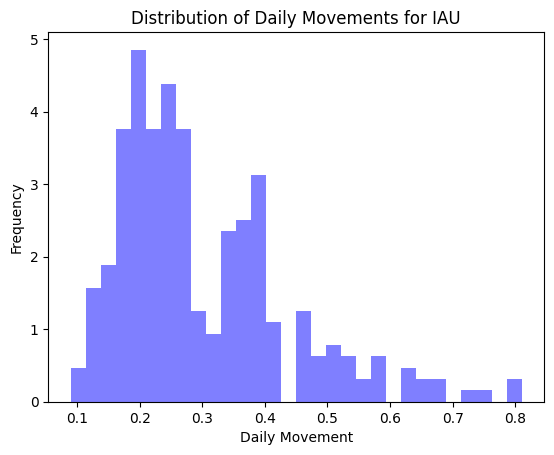

In [ ]:

# Define the ticker symbol for IAU (iShares Gold Trust)
ticker_symbol = "IAU"

# Define the date range for historical data (e.g., 1 year)
start_date = "2022-09-01"
end_date = "2023-09-24"

# Fetch historical data from Yahoo Finance for IAU
iau_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the daily movement (high - low) for IAU
iau_data["Daily_Movement"] = iau_data["High"] - iau_data["Low"]

# Calculate statistics for IAU
average_daily_movement = iau_data["Daily_Movement"].mean()
std_deviation = iau_data["Daily_Movement"].std()
median_daily_movement = iau_data["Daily_Movement"].median()
skewness = iau_data["Daily_Movement"].skew()
kurt = iau_data["Daily_Movement"].kurtosis()

# Calculate the number of values within ±1 and ±2 standard deviations from the mean for IAU
mean = iau_data["Daily_Movement"].mean()
std = iau_data["Daily_Movement"].std()
within_1_std = ((iau_data["Daily_Movement"] >= mean - std) & (iau_data["Daily_Movement"] <= mean + std)).sum()
within_2_std = ((iau_data["Daily_Movement"] >= mean - 2 * std) & (iau_data["Daily_Movement"] <= mean + 2 * std)).sum()

# Find the date when the all-time high daily move occurred for IAU
all_time_high_daily_move = iau_data["High"] - iau_data["Low"]
date_of_all_time_high_move = iau_data.index[iau_data["High"] - iau_data["Low"] == all_time_high_daily_move.max()][0]
max_daily_move = all_time_high_daily_move.max()

# Calculate the normal distribution for IAU
normal_distribution = stats.norm(loc=mean, scale=std_deviation)

# Calculate the probability of values within ±1 and ±2 standard deviations for IAU
confidence_level = 0.95
var_1day = -normal_distribution.ppf(1 - confidence_level) * std_deviation

# Calculate 7-day VaR (Value at Risk) for IAU
var_7day = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(7)

# Calculate 1-month VaR (Value at Risk) for IAU
n_months = 1
var_1month = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(30 * n_months)

# Fetch historical data from Yahoo Finance for major U.S. stock market indices
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq_data = yf.download("^IXIC", start=start_date, end=end_date)
dowjones_data = yf.download("^DJI", start=start_date, end=end_date)

# Calculate the daily movement (high - low) for the indices
sp500_data["Daily_Movement"] = sp500_data["High"] - sp500_data["Low"]
nasdaq_data["Daily_Movement"] = nasdaq_data["High"] - nasdaq_data["Low"]
dowjones_data["Daily_Movement"] = dowjones_data["High"] - dowjones_data["Low"]

# Calculate correlations between IAU and the three indices
correlation_sp500 = iau_data["Daily_Movement"].corr(sp500_data["Daily_Movement"])
correlation_nasdaq = iau_data["Daily_Movement"].corr(nasdaq_data["Daily_Movement"])
correlation_dowjones = iau_data["Daily_Movement"].corr(dowjones_data["Daily_Movement"])

# Print the statistics, VaR measures, and correlations for IAU
print(f"Average Daily Movement for {ticker_symbol}: {average_daily_movement:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Median Daily Movement: {median_daily_movement:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Number of Values within ±1 Standard Deviation: {within_1_std}")
print(f"Number of Values within ±2 Standard Deviations: {within_2_std}")
print(f"All-Time High Daily Move for {ticker_symbol}: {max_daily_move:.2f} on {date_of_all_time_high_move}")
print(f"1-Day VaR at {confidence_level * 100}% Confidence: {var_1day:.2f}")
print(f"7-Day VaR at {confidence_level * 100}% Confidence: {var_7day:.2f}")
print(f"1-Month VaR at {confidence_level * 100}% Confidence: {var_1month:.2f}")
print(f"Correlation with S&P 500: {correlation_sp500:.2f}")
print(f"Correlation with NASDAQ: {correlation_nasdaq:.2f}")
print(f"Correlation with Dow Jones: {correlation_dowjones:.2f}")

# Plot a histogram of daily movements for IAU
plt.hist(iau_data["Daily_Movement"], bins=30, density=True, alpha=0.5, color='b')
plt.title(f'Distribution of Daily Movements for {ticker_symbol}')
plt.xlabel('Daily Movement')
plt.ylabel('Frequency')
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Daily Movement for GLDM: 0.31
Standard Deviation: 0.14
Median Daily Movement: 0.26
Skewness: 1.23
Kurtosis: 1.43
Number of Values within ±1 Standard Deviation: 205
Number of Values within ±2 Standard Deviations: 253
All-Time High Daily Move for GLDM: 0.86 on 2023-03-17 00:00:00
1-Day VaR at 95.0% Confidence: -0.01
7-Day VaR at 95.0% Confidence: -0.03
1-Month VaR at 95.0% Confidence: -0.06
Correlation with S&P 500: 0.38
Correlation with NASDAQ: 0.33
Correlation with Dow Jones: 0.38


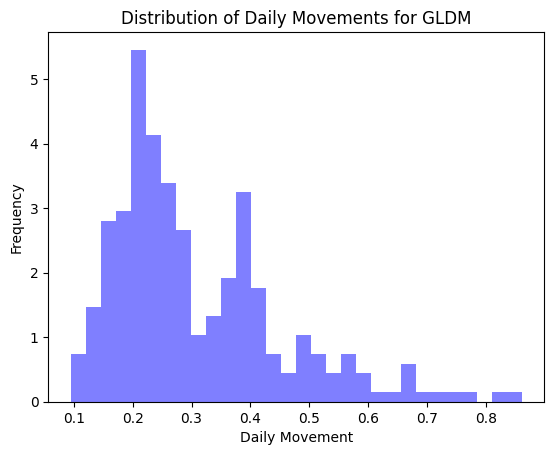

In [ ]:

# Define the ticker symbol for GLDM (SPDR Gold MiniShares Trust)
ticker_symbol = "GLDM"

# Define the date range for historical data (e.g., 1 year)
start_date = "2022-09-01"
end_date = "2023-09-24"

# Fetch historical data from Yahoo Finance for GLDM
gldm_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the daily movement (high - low) for GLDM
gldm_data["Daily_Movement"] = gldm_data["High"] - gldm_data["Low"]

# Calculate statistics for GLDM
average_daily_movement = gldm_data["Daily_Movement"].mean()
std_deviation = gldm_data["Daily_Movement"].std()
median_daily_movement = gldm_data["Daily_Movement"].median()
skewness = gldm_data["Daily_Movement"].skew()
kurt = gldm_data["Daily_Movement"].kurtosis()

# Calculate the number of values within ±1 and ±2 standard deviations from the mean for GLDM
mean = gldm_data["Daily_Movement"].mean()
std = gldm_data["Daily_Movement"].std()
within_1_std = ((gldm_data["Daily_Movement"] >= mean - std) & (gldm_data["Daily_Movement"] <= mean + std)).sum()
within_2_std = ((gldm_data["Daily_Movement"] >= mean - 2 * std) & (gldm_data["Daily_Movement"] <= mean + 2 * std)).sum()

# Find the date when the all-time high daily move occurred for GLDM
all_time_high_daily_move = gldm_data["High"] - gldm_data["Low"]
date_of_all_time_high_move = gldm_data.index[gldm_data["High"] - gldm_data["Low"] == all_time_high_daily_move.max()][0]
max_daily_move = all_time_high_daily_move.max()

# Calculate the normal distribution for GLDM
normal_distribution = stats.norm(loc=mean, scale=std_deviation)

# Calculate the probability of values within ±1 and ±2 standard deviations for GLDM
confidence_level = 0.95
var_1day = -normal_distribution.ppf(1 - confidence_level) * std_deviation

# Calculate 7-day VaR (Value at Risk) for GLDM
var_7day = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(7)

# Calculate 1-month VaR (Value at Risk) for GLDM
n_months = 1
var_1month = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(30 * n_months)

# Fetch historical data from Yahoo Finance for major U.S. stock market indices
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq_data = yf.download("^IXIC", start=start_date, end=end_date)
dowjones_data = yf.download("^DJI", start=start_date, end=end_date)

# Calculate the daily movement (high - low) for the indices
sp500_data["Daily_Movement"] = sp500_data["High"] - sp500_data["Low"]
nasdaq_data["Daily_Movement"] = nasdaq_data["High"] - nasdaq_data["Low"]
dowjones_data["Daily_Movement"] = dowjones_data["High"] - dowjones_data["Low"]

# Calculate correlations between GLDM and the three indices
correlation_sp500 = gldm_data["Daily_Movement"].corr(sp500_data["Daily_Movement"])
correlation_nasdaq = gldm_data["Daily_Movement"].corr(nasdaq_data["Daily_Movement"])
correlation_dowjones = gldm_data["Daily_Movement"].corr(dowjones_data["Daily_Movement"])

# Print the statistics, VaR measures, and correlations for GLDM
print(f"Average Daily Movement for {ticker_symbol}: {average_daily_movement:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Median Daily Movement: {median_daily_movement:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Number of Values within ±1 Standard Deviation: {within_1_std}")
print(f"Number of Values within ±2 Standard Deviations: {within_2_std}")
print(f"All-Time High Daily Move for {ticker_symbol}: {max_daily_move:.2f} on {date_of_all_time_high_move}")
print(f"1-Day VaR at {confidence_level * 100}% Confidence: {var_1day:.2f}")
print(f"7-Day VaR at {confidence_level * 100}% Confidence: {var_7day:.2f}")
print(f"1-Month VaR at {confidence_level * 100}% Confidence: {var_1month:.2f}")
print(f"Correlation with S&P 500: {correlation_sp500:.2f}")
print(f"Correlation with NASDAQ: {correlation_nasdaq:.2f}")
print(f"Correlation with Dow Jones: {correlation_dowjones:.2f}")

# Plot a histogram of daily movements for GLDM
plt.hist(gldm_data["Daily_Movement"], bins=30, density=True, alpha=0.5, color='b')
plt.title(f'Distribution of Daily Movements for {ticker_symbol}')
plt.xlabel('Daily Movement')
plt.ylabel('Frequency')
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Daily Movement for BAR: 0.15
Standard Deviation: 0.07
Median Daily Movement: 0.13
Skewness: 1.29
Kurtosis: 1.71
Number of Values within ±1 Standard Deviation: 202
Number of Values within ±2 Standard Deviations: 252
All-Time High Daily Move for BAR: 0.43 on 2023-03-17 00:00:00
1-Day VaR at 95.0% Confidence: -0.00
7-Day VaR at 95.0% Confidence: -0.01
1-Month VaR at 95.0% Confidence: -0.01
Correlation with S&P 500: 0.38
Correlation with NASDAQ: 0.33
Correlation with Dow Jones: 0.38


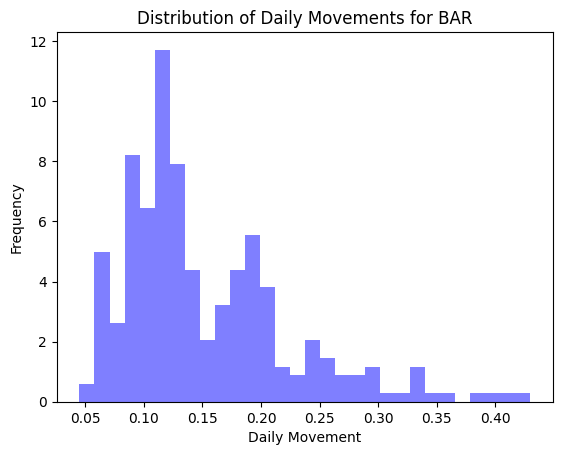

In [ ]:


# Define the ticker symbol for BAR (GraniteShares Gold Shares)
ticker_symbol = "BAR"

# Define the date range for historical data (e.g., 1 year)
start_date = "2022-09-01"
end_date = "2023-09-24"

# Fetch historical data from Yahoo Finance for BAR
bar_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the daily movement (high - low) for BAR
bar_data["Daily_Movement"] = bar_data["High"] - bar_data["Low"]

# Calculate statistics for BAR
average_daily_movement = bar_data["Daily_Movement"].mean()
std_deviation = bar_data["Daily_Movement"].std()
median_daily_movement = bar_data["Daily_Movement"].median()
skewness = bar_data["Daily_Movement"].skew()
kurt = bar_data["Daily_Movement"].kurtosis()

# Calculate the number of values within ±1 and ±2 standard deviations from the mean for BAR
mean = bar_data["Daily_Movement"].mean()
std = bar_data["Daily_Movement"].std()
within_1_std = ((bar_data["Daily_Movement"] >= mean - std) & (bar_data["Daily_Movement"] <= mean + std)).sum()
within_2_std = ((bar_data["Daily_Movement"] >= mean - 2 * std) & (bar_data["Daily_Movement"] <= mean + 2 * std)).sum()

# Find the date when the all-time high daily move occurred for BAR
all_time_high_daily_move = bar_data["High"] - bar_data["Low"]
date_of_all_time_high_move = bar_data.index[bar_data["High"] - bar_data["Low"] == all_time_high_daily_move.max()][0]
max_daily_move = all_time_high_daily_move.max()

# Calculate the normal distribution for BAR
normal_distribution = stats.norm(loc=mean, scale=std_deviation)

# Calculate the probability of values within ±1 and ±2 standard deviations for BAR
confidence_level = 0.95
var_1day = -normal_distribution.ppf(1 - confidence_level) * std_deviation

# Calculate 7-day VaR (Value at Risk) for BAR
var_7day = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(7)

# Calculate 1-month VaR (Value at Risk) for BAR
n_months = 1
var_1month = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(30 * n_months)

# Fetch historical data from Yahoo Finance for major U.S. stock market indices
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq_data = yf.download("^IXIC", start=start_date, end=end_date)
dowjones_data = yf.download("^DJI", start=start_date, end=end_date)

# Calculate the daily movement (high - low) for the indices
sp500_data["Daily_Movement"] = sp500_data["High"] - sp500_data["Low"]
nasdaq_data["Daily_Movement"] = nasdaq_data["High"] - nasdaq_data["Low"]
dowjones_data["Daily_Movement"] = dowjones_data["High"] - dowjones_data["Low"]

# Calculate correlations between BAR and the three indices
correlation_sp500 = bar_data["Daily_Movement"].corr(sp500_data["Daily_Movement"])
correlation_nasdaq = bar_data["Daily_Movement"].corr(nasdaq_data["Daily_Movement"])
correlation_dowjones = bar_data["Daily_Movement"].corr(dowjones_data["Daily_Movement"])

# Print the statistics, VaR measures, and correlations for BAR
print(f"Average Daily Movement for {ticker_symbol}: {average_daily_movement:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Median Daily Movement: {median_daily_movement:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Number of Values within ±1 Standard Deviation: {within_1_std}")
print(f"Number of Values within ±2 Standard Deviations: {within_2_std}")
print(f"All-Time High Daily Move for {ticker_symbol}: {max_daily_move:.2f} on {date_of_all_time_high_move}")
print(f"1-Day VaR at {confidence_level * 100}% Confidence: {var_1day:.2f}")
print(f"7-Day VaR at {confidence_level * 100}% Confidence: {var_7day:.2f}")
print(f"1-Month VaR at {confidence_level * 100}% Confidence: {var_1month:.2f}")
print(f"Correlation with S&P 500: {correlation_sp500:.2f}")
print(f"Correlation with NASDAQ: {correlation_nasdaq:.2f}")
print(f"Correlation with Dow Jones: {correlation_dowjones:.2f}")

# Plot a histogram of daily movements for BAR
plt.hist(bar_data["Daily_Movement"], bins=30, density=True, alpha=0.5, color='b')
plt.title(f'Distribution of Daily Movements for {ticker_symbol}')
plt.xlabel('Daily Movement')
plt.ylabel('Frequency')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Daily Movement for UGL: 0.94
Standard Deviation: 0.45
Median Daily Movement: 0.80
Skewness: 1.21
Kurtosis: 1.37
Number of Values within ±1 Standard Deviation: 205
Number of Values within ±2 Standard Deviations: 254
All-Time High Daily Move for UGL: 2.70 on 2023-03-17 00:00:00
1-Day VaR at 95.0% Confidence: -0.09
7-Day VaR at 95.0% Confidence: -0.23
1-Month VaR at 95.0% Confidence: -0.47
Correlation with S&P 500: 0.33
Correlation with NASDAQ: 0.28
Correlation with Dow Jones: 0.33


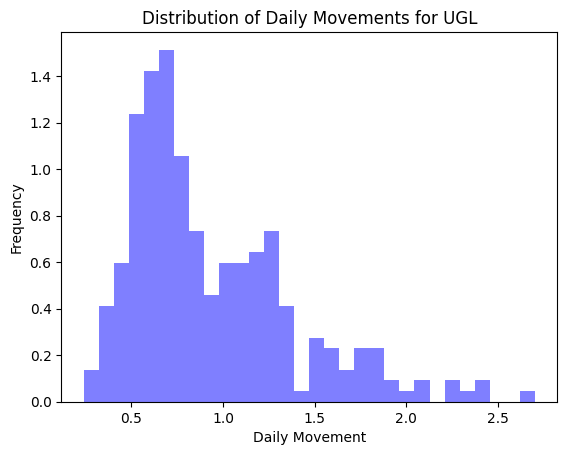

In [ ]:

# Define the ticker symbol for UGL (ProShares Ultra Gold)
ticker_symbol = "UGL"

# Define the date range for historical data (e.g., 1 year)
start_date = "2022-09-01"
end_date = "2023-09-24"

# Fetch historical data from Yahoo Finance for UGL
ugl_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the daily movement (high - low) for UGL
ugl_data["Daily_Movement"] = ugl_data["High"] - ugl_data["Low"]

# Calculate statistics for UGL
average_daily_movement = ugl_data["Daily_Movement"].mean()
std_deviation = ugl_data["Daily_Movement"].std()
median_daily_movement = ugl_data["Daily_Movement"].median()
skewness = ugl_data["Daily_Movement"].skew()
kurt = ugl_data["Daily_Movement"].kurtosis()

# Calculate the number of values within ±1 and ±2 standard deviations from the mean for UGL
mean = ugl_data["Daily_Movement"].mean()
std = ugl_data["Daily_Movement"].std()
within_1_std = ((ugl_data["Daily_Movement"] >= mean - std) & (ugl_data["Daily_Movement"] <= mean + std)).sum()
within_2_std = ((ugl_data["Daily_Movement"] >= mean - 2 * std) & (ugl_data["Daily_Movement"] <= mean + 2 * std)).sum()

# Find the date when the all-time high daily move occurred for UGL
all_time_high_daily_move = ugl_data["High"] - ugl_data["Low"]
date_of_all_time_high_move = ugl_data.index[ugl_data["High"] - ugl_data["Low"] == all_time_high_daily_move.max()][0]
max_daily_move = all_time_high_daily_move.max()

# Calculate the normal distribution for UGL
normal_distribution = stats.norm(loc=mean, scale=std_deviation)

# Calculate the probability of values within ±1 and ±2 standard deviations for UGL
confidence_level = 0.95
var_1day = -normal_distribution.ppf(1 - confidence_level) * std_deviation

# Calculate 7-day VaR (Value at Risk) for UGL
var_7day = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(7)

# Calculate 1-month VaR (Value at Risk) for UGL
n_months = 1
var_1month = -normal_distribution.ppf(1 - confidence_level) * std_deviation * np.sqrt(30 * n_months)

# Fetch historical data from Yahoo Finance for major U.S. stock market indices
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq_data = yf.download("^IXIC", start=start_date, end=end_date)
dowjones_data = yf.download("^DJI", start=start_date, end=end_date)

# Calculate the daily movement (high - low) for the indices
sp500_data["Daily_Movement"] = sp500_data["High"] - sp500_data["Low"]
nasdaq_data["Daily_Movement"] = nasdaq_data["High"] - nasdaq_data["Low"]
dowjones_data["Daily_Movement"] = dowjones_data["High"] - dowjones_data["Low"]

# Calculate correlations between UGL and the three indices
correlation_sp500 = ugl_data["Daily_Movement"].corr(sp500_data["Daily_Movement"])
correlation_nasdaq = ugl_data["Daily_Movement"].corr(nasdaq_data["Daily_Movement"])
correlation_dowjones = ugl_data["Daily_Movement"].corr(dowjones_data["Daily_Movement"])

# Print the statistics, VaR measures, and correlations for UGL
print(f"Average Daily Movement for {ticker_symbol}: {average_daily_movement:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Median Daily Movement: {median_daily_movement:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Number of Values within ±1 Standard Deviation: {within_1_std}")
print(f"Number of Values within ±2 Standard Deviations: {within_2_std}")
print(f"All-Time High Daily Move for {ticker_symbol}: {max_daily_move:.2f} on {date_of_all_time_high_move}")
print(f"1-Day VaR at {confidence_level * 100}% Confidence: {var_1day:.2f}")
print(f"7-Day VaR at {confidence_level * 100}% Confidence: {var_7day:.2f}")
print(f"1-Month VaR at {confidence_level * 100}% Confidence: {var_1month:.2f}")
print(f"Correlation with S&P 500: {correlation_sp500:.2f}")
print(f"Correlation with NASDAQ: {correlation_nasdaq:.2f}")
print(f"Correlation with Dow Jones: {correlation_dowjones:.2f}")

# Plot a histogram of daily movements for UGL
plt.hist(ugl_data["Daily_Movement"], bins=30, density=True, alpha=0.5, color='b')
plt.title(f'Distribution of Daily Movements for {ticker_symbol}')
plt.xlabel('Daily Movement')
plt.ylabel('Frequency')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


NameError: ignored